


#ImageDataGenerator
 If you use the ImageDataGenerator class, your model will be able to receive new iterations of the photographs at each epoch. This will be possible because of how the class
 works. Be mindful, however, that it will just return the photographs that have been changed; it will not add these pictures to the collection of photographs that you already own.
##matplotlib
importing matplot library use of  data visualization and graphical plotting.

#to_categorical
function known as to_categorical. Performs the conversion from an integer class vector to a binary class matrix. For example, this may be used with the categorical cross-entropy.
 y: A structure similar to an array, containing class values that need to be translated into a matrix (integers ranging from 0 to num_classes minus 1).


In [2]:
import numpy as np
#importing  numpy library 
import matplotlib.pyplot as matplotlib
#importing matplot library use of visualization
import cv2
# importing cv2 library use of image reading
import os
from sklearn.utils import shuffle
#importing shuffle library use of data saffle 
import glob
# importing  glob library
import tqdm
# importing tqdm library
import tensorflow as tf
from skimage import io

""" If you use the ImageDataGenerator class, your model will be able to receive new iterations of the photographs at each epoch. This will be possible because of how the class
 works. Be mindful, however, that it will just return the photographs that have been changed; it will not add these pictures to the collection of photographs that you already own.

"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
#importing randam library
from sklearn.model_selection import train_test_split
"""
function known as to_categorical. Performs the conversion from an integer class vector to a binary class matrix. For example, this may be used with the categorical cross-entropy.
 y: A structure similar to an array, containing class values that need to be translated into a matrix (integers ranging from 0 to num_classes minus 1).
"""
from tensorflow.keras.utils import to_categorical
import tensorflow # importing tensorflow
from tensorflow import keras # importing keras
"""
When building models, layer-by-layer, the Sequential API is what's needed. Creating more complicated models may also be done using an alternate method known as functional API.
Within a functional model, numerous inputs and outputs may share layers, and this can be defined. To begin, an instance of the model is created, and then connections are made to
the layers in order to access the model's input and output.
"""
from tensorflow.keras.models import Sequential # importing sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten # importing Dense, Dropout, Flatten
"""
Specifically, the MaxPooling2D class. For spatial data in two dimensions, the Max pooling procedure may be used. Each input channel is downsampled along its height and breadth
by taking its maximum value across an input window (of size pool_size). The window is moved in each dimension by a set number of steps.


"""
from tensorflow.keras.layers import Conv2D, MaxPooling2D # importing Conv2D, MaxPooling2D


In [3]:
image_dataset=glob.glob("/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/*/*/*") # Reading dataset 

In [4]:
image_dataset # showing dataset 

['/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1005.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1025.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1009.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1016.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1021.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1007.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1013.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1020.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1011.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1001.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1002.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSe

In [5]:
len(image_dataset) # printing lenth of datset 

192

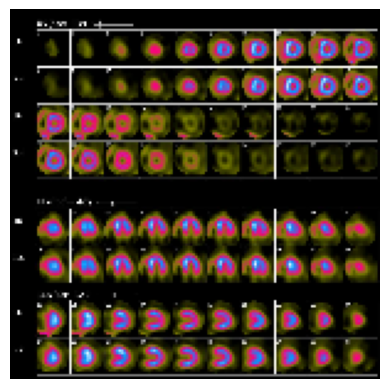

In [8]:
img_size = 150

# Read an image from the image dataset
img_array = cv2.imread(image_dataset[28])

# Resize the image to a new size (img_size x img_size)
new_arr = cv2.resize(img_array, (img_size, img_size))

# Display the resized image using a grayscale colormap
matplotlib.imshow(new_arr, cmap='gray')

# Turn off the axis labels
matplotlib.axis("off");


In [9]:

def normalize_image(image):
    # Convert image to float
    image = image.astype(np.float32)
    # Normalize image to range [0, 1]
    image /= 255.0
    mean = np.mean(image)
    std = np.std(image)
    image = (image - mean) / std
    return image
image = cv2.imread(image_dataset[28])

# Normalize image
normalized_image = normalize_image(img_array)


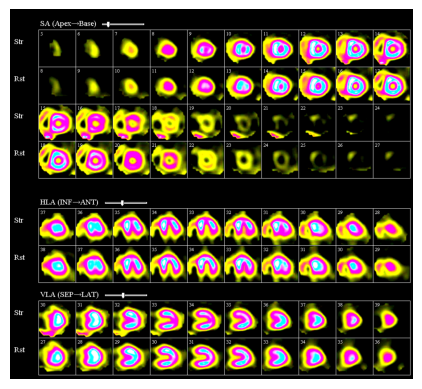

In [10]:
matplotlib.imshow(normalized_image,)
matplotlib.axis("off");

In [11]:
data = []
labels = []

# Function to normalize an image
def normalize_image(image):
    # Convert image to float32 type
    image = image.astype(np.float32)
    # Adjust pixel values to be uniformly between 0 and 1
    image /= 255.0
    # Determine the image's mean value as well as its standard deviation.
    mean = np.mean(image)
    std = np.std(image)
    # Normalise the picture by deducting the mean from it, then dividing the result by the standard deviation.
    image = (image - mean) / std
    return image

# Iterate over the image dataset
for i in tqdm.tqdm(range(len(image_dataset))):
    # Read the image
    img = cv2.imread(image_dataset[i])
    # Resize the image to a fixed size (256x256)
    img = cv2.resize(img, (256, 256))
    
    # Normalize the image
    normalized_image = normalize_image(img)
    
    # Append the normalized image to the data list
    data.append(normalized_image)
    
    # Get the label for the class from the picture location.
    cls = image_dataset[i].split(os.path.sep)[-2]
    
    # Assign a numerical label based on the class
    if cls == 'Normal':
        lbl = 0
    elif cls == 'Abnormal':
        lbl = 1
    else:
        lbl = -1
    
    # Append the label to the labels list
    labels.append(lbl)


100%|██████████| 192/192 [00:36<00:00,  5.26it/s]


In [12]:
# Shuffle the data and labels in unison
# Combine the data and labels into a single list of tuples
combined = list(zip(data, labels))

# Shuffle the combined list randomly
random.shuffle(combined)

# Unzip the shuffled list back into separate data and labels
data, labels = zip(*combined)


In [13]:
data=np.array(data)
labels=np.array(labels)

In [14]:
data.shape, labels.shape # printing shape of data and lables

((192, 256, 256, 3), (192,))

In [ ]:
# Create training and testing sets for the data and labels.
# - `data` is the input data (features)
# - `labels` are the corresponding labels or targets
# - `test_size=0.2` specifies the proportion of the data to be used for testing (20% in this case)
Xtrain_spect_mpi_data, Xtest_spect_mpi_data, ytrain_spect_mpi_data, ytest_spect_mpi_data = train_test_split(data, labels, test_size=0.2)


In [ ]:
Xtrain_spect_mpi_data.shape, Xtest_spect_mpi_data.shape # printing shape

((153, 256, 256, 3), (39, 256, 256, 3))

In [ ]:
ytrain_spect_mpi_data.shape,ytest_spect_mpi_data.shape # printing shape

((153,), (39,))

In [ ]:
ytrain_spect_mpi_data = to_categorical(ytrain_spect_mpi_data)
ytest_spect_mpi_data = to_categorical(ytest_spect_mpi_data)

In [ ]:
ytrain_spect_mpi_data.shape, ytest_spect_mpi_data.shape  # printing shape 

((153, 2), (39, 2))

#ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,   
    # Images may be rotated by a maximum of 15 degrees.
    width_shift_range=0.2, 
     # # Move pictures to the left or right by up to 20% of their width in each direction.
    height_shift_range=0.2, 
    # Rotate photos horizontally by up to twenty percent of their height.
    shear_range=0.30,   
    # Transformation of shear with a range of 0.30 
    zoom_range=0.15,  
    # Zoom in on photos up to 15 percent.
    horizontal_flip=True,  
    # Rotate the photos so they are horizontal.
    vertical_flip=True, 
   # Rotate photos such that they are vertical
    fill_mode='nearest'   # Fill in any pixels that have been freshly produced as a result of rotation or shifting
)


#InceptionV3 model

In [ ]:
def create_model(base_model):
    # Set the base model as trainable
    base_model.trainable = True
    
    # Global average pooling layer
    global_average_layer = tensorflow.keras.layers.GlobalAveragePooling2D()(base_model.output)
    
    # Dropout layer for regularization
    dropout_layer = tf.keras.layers.Dropout(0.3)(global_average_layer)
    
    # Prediction layer with softmax activation for 2 classes
    prediction_layer = tensorflow.keras.layers.Dense(2, activation='softmax')(dropout_layer)
    
    # Create the final model with the specified inputs and outputs
    model = tensorflow.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    
    # Compile the model with optimizer, loss function, and metrics
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tensorflow.keras.losses.CategoricalCrossentropy(),
                  metrics=["accuracy"])
    
    # Return the created model
    return model


In [ ]:
def fit_model(model):
    # Train the model using the specified data generator and other parameters
    # - `datagen.flow(Xtrain_spect_mpi_data, ytrain_spect_mpi_data)` generates batches of augmented training data
    # - `batch_size=32` specifies the batch size used for training
    # - `validation_data=datagen.flow(Xtest_spect_mpi_data, ytest_spect_mpi_data)` uses augmented validation data during training
    # - `epochs=50` specifies the number of training epochs
    history = model.fit(datagen.flow(Xtrain_spect_mpi_data, ytrain_spect_mpi_data), batch_size=32,
                        validation_data=datagen.flow(Xtest_spect_mpi_data, ytest_spect_mpi_data), epochs=50)
    
    # Return the history object that contains information about the training process
    return history

# Define the input shape for the images
IMG_SHAPE = (256, 256, 3)

# Create the base model (InceptionV3) with the specified input shape
# - `include_top=False` excludes the top (fully connected) layers of the InceptionV3 model
# - `weights="imagenet"` loads the pre-trained weights from ImageNet
base_model2 = tensorflow.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

# Create the model by combining the base model with additional layers
model = create_model(base_model2)

# Fit the model to the training data and obtain the training history
history = fit_model(model)


Epoch 1/50
5/5 [==============================] - 48s 3s/step - loss: 1.0620 - accuracy: 0.5229 - val_loss: 1.9931 - val_accuracy: 0.2821
Epoch 2/50
5/5 [==============================] - 3s 659ms/step - loss: 0.6870 - accuracy: 0.7124 - val_loss: 6.1361 - val_accuracy: 0.8462
Epoch 3/50
5/5 [==============================] - 3s 640ms/step - loss: 0.5523 - accuracy: 0.7582 - val_loss: 601.9644 - val_accuracy: 0.8462
Epoch 4/50
5/5 [==============================] - 4s 921ms/step - loss: 0.5968 - accuracy: 0.7582 - val_loss: 372.2081 - val_accuracy: 0.8462
Epoch 5/50
5/5 [==============================] - 3s 608ms/step - loss: 0.5543 - accuracy: 0.7386 - val_loss: 1903.4796 - val_accuracy: 0.1538
Epoch 6/50
5/5 [==============================] - 3s 633ms/step - loss: 0.5005 - accuracy: 0.7582 - val_loss: 89.5888 - val_accuracy: 0.8462
Epoch 7/50
5/5 [==============================] - 4s 895ms/step - loss: 0.4618 - accuracy: 0.7647 - val_loss: 34.3633 - val_accuracy: 0.8462
Epoch 8/50
5/

In [ ]:
model.evaluate(Xtest_spect_mpi_data,ytest_spect_mpi_data)

2/2 [==============================] - 0s 37ms/step - loss: 0.7963 - accuracy: 0.8462


[0.7962915301322937, 0.8461538553237915]

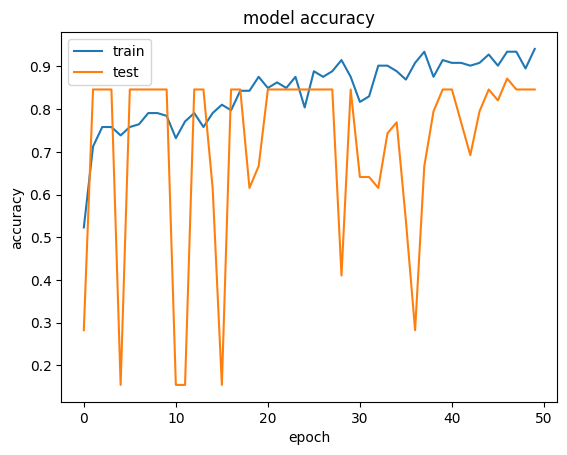

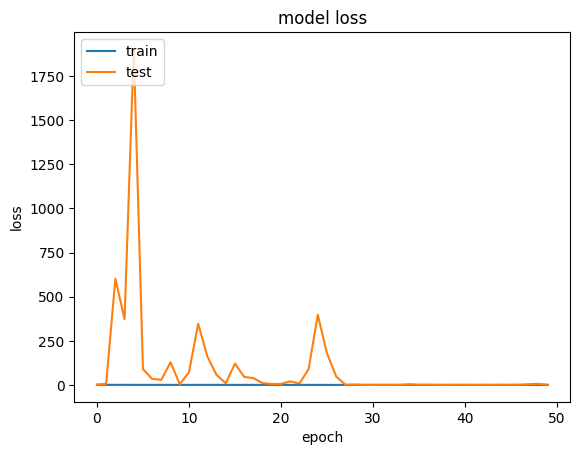

In [ ]:
#accuracy graph 
matplotlib.plot(history.history['accuracy'])  # Plot the training accuracy
matplotlib.plot(history.history['val_accuracy'])  # Plot the validation accuracy
#set title name 
matplotlib.title('Model Accuracy')
# set y axis name 
matplotlib.ylabel('Accuracy')
#  x axis name 
matplotlib.xlabel('Epoch')
matplotlib.legend(['Train', 'Test'], loc='upper left')   # Add a legend to the plot indicating the train and test lines
matplotlib.show()  # Display the plot

#  loss graph
matplotlib.plot(history.history['loss'])  # Plot the training loss
matplotlib.plot(history.history['val_loss'])  # Plot the validation loss
#set title name 
matplotlib.title('Model Loss')
# set y axis name 
matplotlib.ylabel('Loss')
# set x axis name 
matplotlib.xlabel('Epoch')
matplotlib.legend(['Train', 'Test'], loc='upper left')  # Add a legend to the plot indicating the train and test lines
matplotlib.show()  # Display the plot
